# Real Estate Data Analysis Report

## Introduction

This report presents an analysis of a housing dataset, aimed at understanding the factors influencing house prices. The dataset includes various features like median income, housing median age, total rooms, bedrooms, population, and proximity to the ocean.

## Data Preparation and Cleaning

The dataset underwent several preprocessing steps:

- **Missing Values**: Filled missing values in the `total_bedrooms` column with the median value.
- **One-Hot Encoding**: Applied to `ocean_proximity` to convert it from categorical to numeric format.

## Exploratory Data Analysis (EDA)

### Correlation Analysis

- **Median Income** showed a strong positive correlation with house value.
- **Geographic Features** (`ocean_proximity_<1H OCEAN`, `NEAR BAY`, `NEAR OCEAN`) exhibited varying degrees of positive correlation.
- **Negative Correlation**: Notably, `ocean_proximity_INLAND` had a negative correlation with house prices.

### Data Visualization

- **Histograms** revealed the distributions of `median_income`, `housing_median_age`, and `median_house_value`, highlighting right-skewed patterns in income and house values.
- **Scatter Plots** showed a clear positive trend between `median_income` and `median_house_value`, while the relationship between `total_rooms` and house value was less pronounced.

## Linear Regression Model

A linear regression model was trained to predict house prices. The model had a Root Mean Squared Error (RMSE) of approximately $68,696, indicating the average deviation of predicted values from actual house prices.

## Conclusions and Recommendations

The analysis suggests that `median_income` and `ocean_proximity` are significant predictors of house prices. However, the model's accuracy can be further improved by incorporating more nuanced features or using advanced regression techniques.

### For Future Work, It's Recommended To Explore:

- **Advanced Regression Models**: Including Ridge, Lasso, and Polynomial Regression for better accuracy.
- **Feature Engineering**: To uncover more predictive features.
- **Geospatial Analysis**: Utilizing longitude and latitude data for location-specific insights.


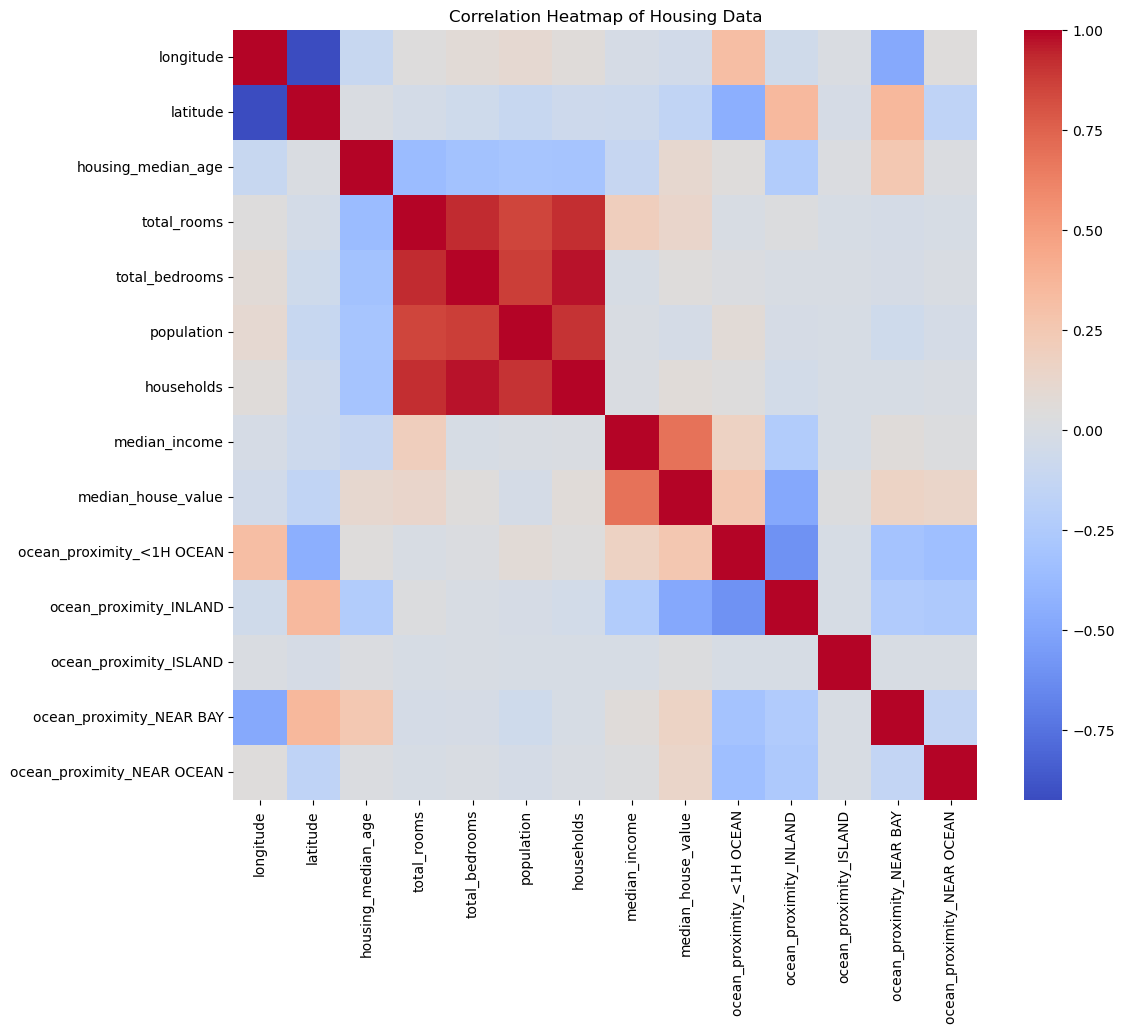

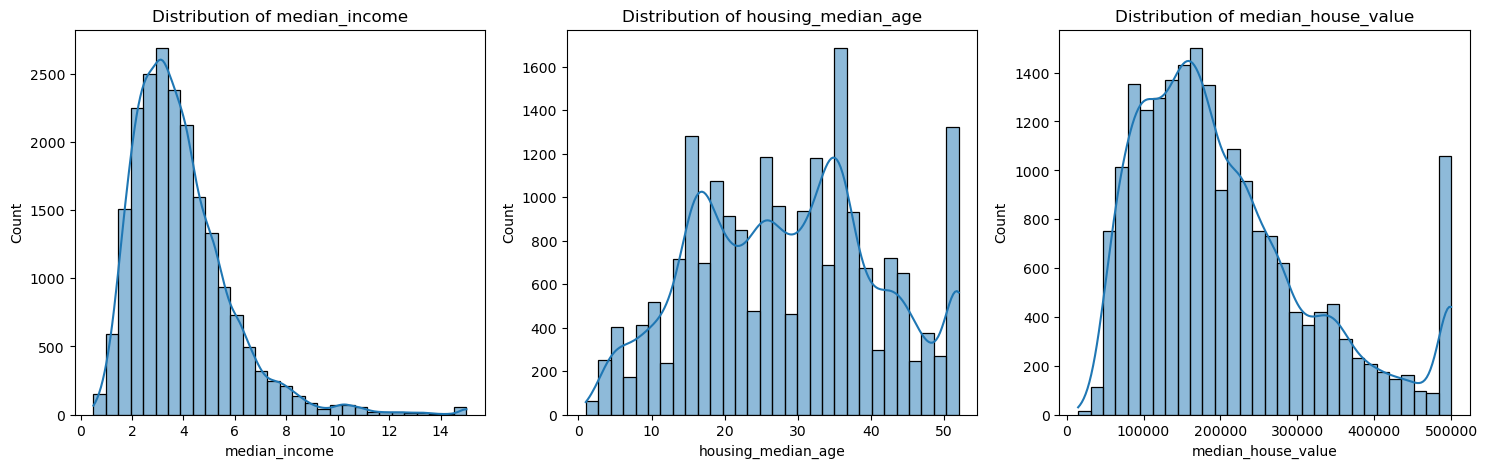

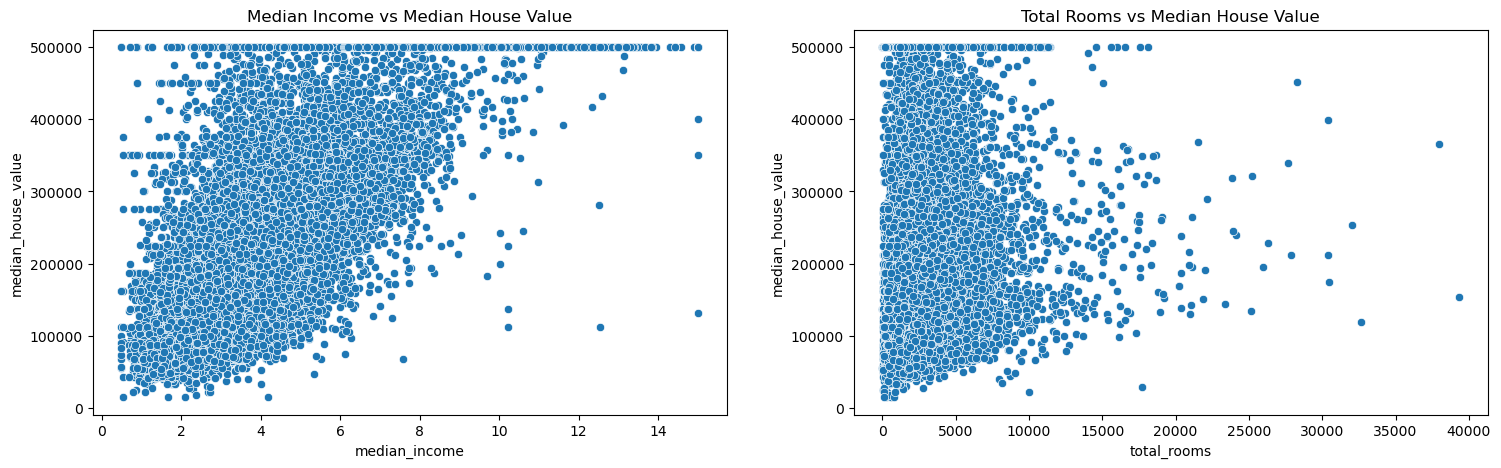

RMSE of the Model: 68696.37609238953


In [33]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Load and prepare the dataset
file_path = './1553768847-housing.csv'
housing_data = pd.read_csv(file_path)
housing_data['total_bedrooms'].fillna(housing_data['total_bedrooms'].median(), inplace=True)
housing_data_encoded = pd.get_dummies(housing_data, columns=['ocean_proximity'])

# Correlation matrix and visualization
correlation_matrix = housing_data_encoded.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm')
plt.title('Correlation Heatmap of Housing Data')
plt.show()

# Histograms for key features
plt.figure(figsize=(18, 5))
features = ['median_income', 'housing_median_age', 'median_house_value']
for i, feature in enumerate(features):
    plt.subplot(1, 3, i+1)
    sns.histplot(housing_data[feature], bins=30, kde=True)
    plt.title(f'Distribution of {feature}')
plt.show()

# Scatter plots
plt.figure(figsize=(18, 5))
plt.subplot(1, 2, 1)
sns.scatterplot(x=housing_data['median_income'], y=housing_data['median_house_value'])
plt.title('Median Income vs Median House Value')
plt.subplot(1, 2, 2)
sns.scatterplot(x=housing_data['total_rooms'], y=housing_data['median_house_value'])
plt.title('Total Rooms vs Median House Value')
plt.show()

# Linear regression model
X = housing_data_encoded.drop('median_house_value', axis=1)
y = housing_data_encoded['median_house_value']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
rmse = mean_squared_error(y_test, y_pred, squared=False)

# Displaying the RMSE
print("RMSE of the Model:", rmse)
